# Time series Analysis and Model Building

### Importing Libraries

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [181]:
df = pd.read_excel(r"E:\Users\Windows 10\Downloads\data\all_data3.xlsx")
df

,Unnamed: 0,datekey,Product,Store,Quantity,Geography,Category,PromoID
0,0,2015-01-01,Product103,Store25,1,MIDWEST,Category3,No Promo
1,1,2015-01-01,Product103,Store4,1,MIDWEST,Category3,No Promo
2,2,2015-01-01,Product105,Store12,-1,NORTHEAST,Category3,No Promo
3,3,2015-01-01,Product105,Store2,1,SOUTH,Category3,No Promo
4,4,2015-01-01,Product105,Store25,1,MIDWEST,Category3,No Promo
...,...,...,...,...,...,...,...,...
793373,793374,2016-12-31,Product99,Store27,1,SOUTH,Category3,Promo4
793374,793375,2016-12-31,Product99,Store27,1,SOUTH,Category3,Promo4
793375,793377,2016-12-31,Product99,Store28,-1,MIDWEST,Category3,Promo4
793376,793378,2016-12-31,Product99,Store5,1,SOUTH,Category3,Promo4


In [182]:
#Deleting unnecessary column
df.drop(columns = 'Unnamed: 0', inplace = True)

### Splitting into training and testing data

#### We have data of 2 years (24 months) (2015, 2016). So we will take data of first 20 months for training and last 4 months for testing

In [183]:
train_data = df[df['datekey'] <= "2016-08-31"]
train_data

,datekey,Product,Store,Quantity,Geography,Category,PromoID
0,2015-01-01,Product103,Store25,1,MIDWEST,Category3,No Promo
1,2015-01-01,Product103,Store4,1,MIDWEST,Category3,No Promo
2,2015-01-01,Product105,Store12,-1,NORTHEAST,Category3,No Promo
3,2015-01-01,Product105,Store2,1,SOUTH,Category3,No Promo
4,2015-01-01,Product105,Store25,1,MIDWEST,Category3,No Promo
...,...,...,...,...,...,...,...
518731,2016-08-31,Product95,Store6,1,WEST,Category1,No Promo
518732,2016-08-31,Product96,Store13,1,SOUTH,Category1,No Promo
518733,2016-08-31,Product96,Store18,1,SOUTH,Category1,No Promo
518734,2016-08-31,Product96,Store19,1,SOUTH,Category1,No Promo


In [184]:
test_data = df[df['datekey'] > "2016-08-31"]
test_data

,datekey,Product,Store,Quantity,Geography,Category,PromoID
518736,2016-09-01,Product1,Store19,1,SOUTH,Category1,No Promo
518737,2016-09-01,Product1,Store2,1,SOUTH,Category1,No Promo
518738,2016-09-01,Product1,Store24,-1,WEST,Category1,No Promo
518739,2016-09-01,Product1,Store25,1,MIDWEST,Category1,No Promo
518740,2016-09-01,Product1,Store6,1,WEST,Category1,No Promo
...,...,...,...,...,...,...,...
793373,2016-12-31,Product99,Store27,1,SOUTH,Category3,Promo4
793374,2016-12-31,Product99,Store27,1,SOUTH,Category3,Promo4
793375,2016-12-31,Product99,Store28,-1,MIDWEST,Category3,Promo4
793376,2016-12-31,Product99,Store5,1,SOUTH,Category3,Promo4


### Aggregating Quantity at weekly level

In [185]:
#Aggregating training data
week_train=train_data.set_index('datekey')
weekly_train = week_train['Quantity'].resample('W').sum()

In [186]:
#Converting the weekly training data into data frame
weekly_train = pd.DataFrame(weekly_train)
weekly_train

,Quantity
datekey,
2015-01-04,1734
2015-01-11,1848
2015-01-18,1843
2015-01-25,2000
2015-02-01,1924
...,...
2016-08-07,4001
2016-08-14,4045
2016-08-21,4188


In [187]:
#Aggregating testing data
week_test=test_data.set_index('datekey')
weekly_test = week_test['Quantity'].resample('W').sum()

In [188]:
#Converting the weekly testing data into data frame
weekly_test = pd.DataFrame(weekly_test)

weekly_test

,Quantity
datekey,
2016-09-04,3504
2016-09-11,5717
2016-09-18,24922
2016-09-25,8685
2016-10-02,6449
2016-10-09,13589
2016-10-16,17509
2016-10-23,5702
2016-10-30,4953


In [189]:
#Aggregating whole data at weekly level...will be usefull if needed in future
week_all=df.set_index('datekey')
weekly_all = week_all['Quantity'].resample('W').sum()

## Decomposition plots

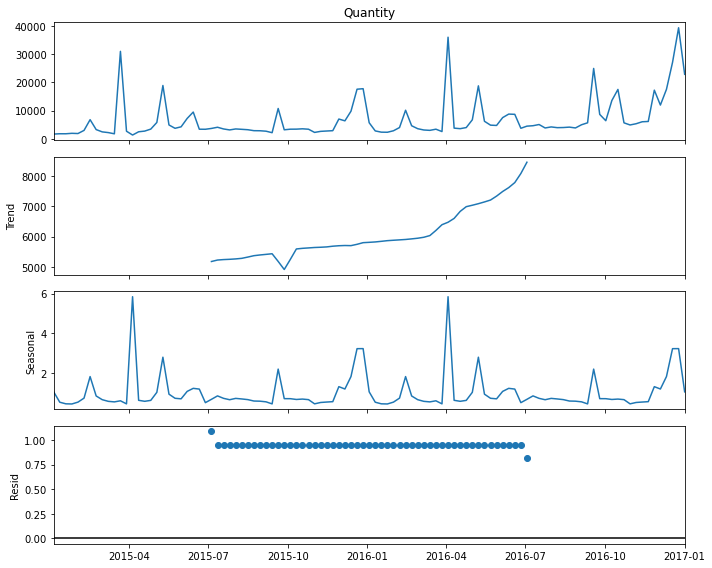

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

#With multiplicative model
rcParams['figure.figsize'] = 10,8
result = seasonal_decompose(weekly_all, model='multiplicative')
result.plot()
plt.show()

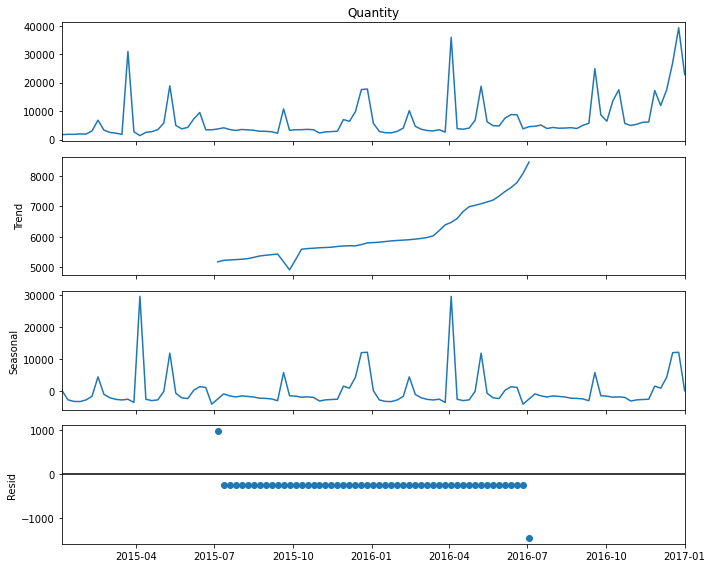

In [191]:
#With Additive model
rcParams['figure.figsize'] = 10,8
result = seasonal_decompose(weekly_all, model='additive')
result.plot()
plt.show()

#### As we can see residuals of additive model decomposition plot closed to zero.That means all the components are additive in our time series

In [192]:
import statsmodels.api as sm
import pandas as pd

# Assuming you have a time series named 'ts'
# Replace 'ts' with your actual time series data

# Perform the Dickey-Fuller test
result = sm.tsa.adfuller(weekly_all)

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")
    
# Check for stationarity based on the p-value
if p_value <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -6.612680590127327
p-value: 6.319098453682826e-09
Critical Values:
   1%: -3.4948504603223145
   5%: -2.889758398668639
   10%: -2.5818220155325444
The time series is stationary.


#### Since, time series is stationary. There is no trend and seasonality. It may be due to we have short period of data.
#### So we will move forward with original time series. 

### ACF Plot

<Figure size 720x432 with 0 Axes>

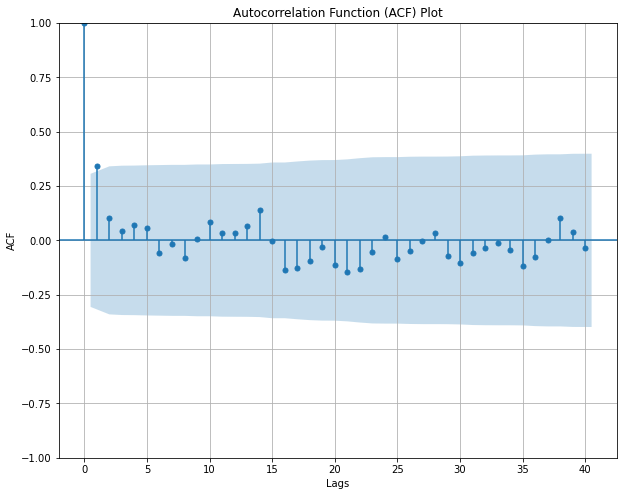

In [193]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate the ACF
acf = sm.tsa.acf(weekly_all, nlags=40)  # Change the number of lags as needed

# Create the ACF plot
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(acf, lags=40)  # Change the number of lags as needed
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.title("Autocorrelation Function (ACF) Plot")
plt.grid(True)
plt.show()

#### Since, no any point is outside the bounds. This is giving us Moving Average parameter as 0

### PACF Plot

<Figure size 720x432 with 0 Axes>

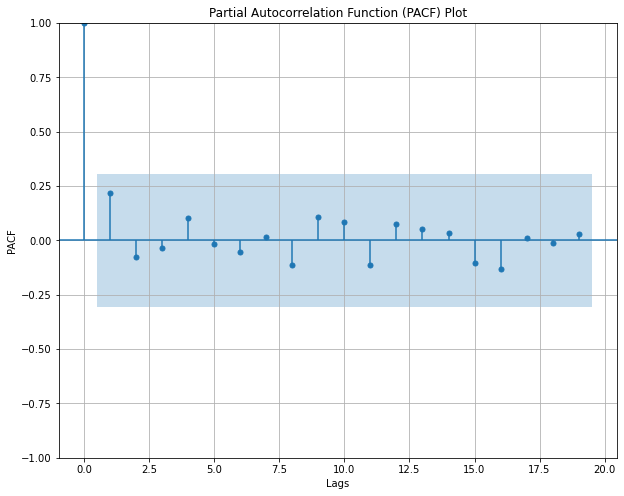

In [194]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate the PACF
pacf = sm.tsa.pacf(weekly_all, nlags=40)  # Change the number of lags as needed

# Create the PACF plot
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_pacf(pacf, lags=19)  # Change the number of lags as needed
plt.xlabel("Lags")
plt.ylabel("PACF")
plt.title("Partial Autocorrelation Function (PACF) Plot")
plt.grid(True)
plt.show()

#### Since, no any point is outside the bounds. This is giving us Auto-regressive parameter as 0

#### Also, there is no trend component(Stationary time series) differencing parameter is also 0

#### So, we will try to model time series with ARIMA(0,0,0) model

In [195]:
# Define the order (p, d, q) of the ARIMA model
p, d, q = 0, 0, 0

# Create and fit the ARIMA model
model = sm.tsa.ARIMA(weekly_train, order=(p, d, q))
results = model.fit()

In [196]:
forecast_steps = 18  # Number of forecasted steps
forecast = results.forecast(steps=forecast_steps)

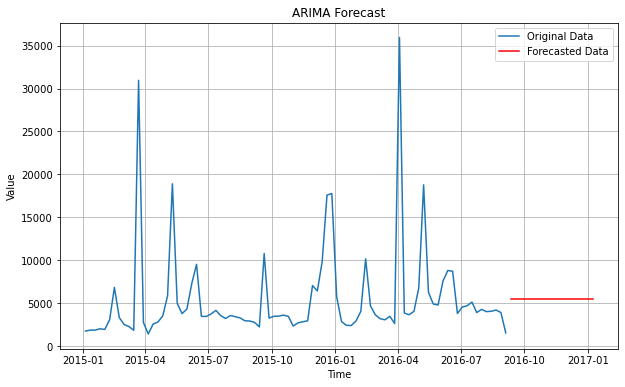

In [197]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_train.index,weekly_train , label='Original Data')
plt.plot(forecast.index, forecast, label='Forecasted Data', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('ARIMA Forecast')
plt.grid(True)
plt.show()

#### As we can see the results of ARIMA(0,0,0) model on testing data. Model is giving same values for all the data points in testing data. This represents the ARIMA(0,0,0) model is not good for this data

In [202]:
acc = np.mean(1-((weekly_test['Quantity']-forecast)/weekly_test['Quantity']))
acc

0.5763119488226173

#### Accuracy is also less

#### Let's try auto_arima function to get best fitted ARIMA model for our data

In [205]:
!pip install pmdarima

In [206]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(weekly_train['Quantity'],
                        start_p = 0,
                        d = None,
                        start_q = 0,
                        max_p = 10,
                        max_d = 10,
                        max_q = 10,
                        stepwise = True,
                        suppress_warnings = True,
                        error_action = 'trace',
                        trace = True,
                        n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1771.842, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1773.387, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1773.356, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1828.343, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1775.293, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.105 seconds


#### As we can see auto arima is also giving us same model which we had build already.

#### Let's try with seasonality parameter in auto_arima function. Though, time series is stationary, we are just checking to get better model than ARIMA(0,0,0)

In [207]:
sarima_model = auto_arima(weekly_train['Quantity'],
                        start_p = 0,
                        d = None,
                        start_q = 0,
                        max_p = 10,
                        max_d = 10,
                        max_q = 10,
                        stepwise = True,
                        suppress_warnings = True,
                        error_action = 'trace',
                        trace = True,
                        n_fits = 50,
                        start_Q = 0,
                        max_P = 12,
                        max_D = 12,
                        max_Q = 12,
                        max_order = 5,
                        m = 52,   # seasonality parameter weekly data showing yearly repetetive pattern
                        seasonal = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=1773.663, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1771.842, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1775.133, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1774.751, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1828.343, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=1773.288, Time=0.15 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=1775.287, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1773.387, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=1773.356, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=1775.293, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[52] intercept
Total fit time: 1.329 seconds


#### Again we are getting same model. 

#### Means no ARIMA or SARIMA model is good for this time series

#### Let's try Holt-Winter method (Tripple exponential smoothing) 

In [208]:
# Define model parameters
trend_type = 'add'  # time series is additive
seasonality_type = 'add'  # time series is additive
seasonal_periods = 44  # Adjust based on your data's seasonality

# Create and fit the Triple Exponential Smoothing model
model = sm.tsa.ExponentialSmoothing(weekly_train, trend=trend_type, seasonal=seasonality_type, seasonal_periods=seasonal_periods)
results = model.fit()

In [209]:
#Forecasting for testing data
forecast_steps = 18  # Number of forecasted steps
forecast = results.forecast(steps=forecast_steps)

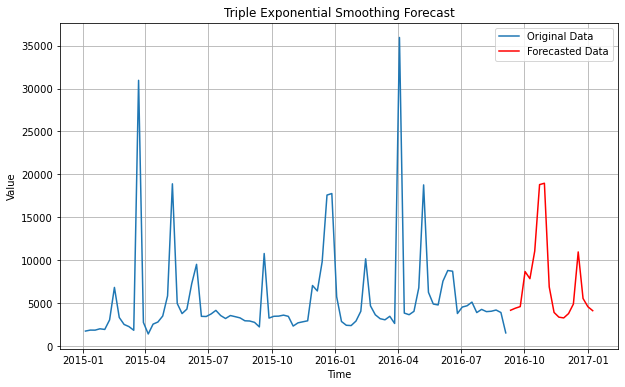

In [210]:
# plotting time series with forecasted results
plt.figure(figsize=(10, 6))
plt.plot(weekly_train.index, weekly_train, label='Original Data')
plt.plot(forecast.index, forecast, label='Forecasted Data', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Triple Exponential Smoothing Forecast')
plt.grid(True)
plt.show()

### Model Validation Metrices

In [211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(weekly_test['Quantity'], forecast)

# Calculate MSE
mse = mean_squared_error(weekly_test['Quantity'], forecast)

# Calculate RMSE
rmse = np.sqrt(mse)

In [212]:
mae

8444.414082642043

In [213]:
mse

162154725.09146234

In [214]:
rmse

12733.99878637745

In [215]:
acc = np.mean(1-((weekly_test['Quantity']-forecast)/weekly_test['Quantity']))
acc

0.8885443073424583

#### Accuracy is better than ARIMA model

In [216]:
x = np.array(weekly_test['Quantity'])
x

array([ 3504,  5717, 24922,  8685,  6449, 13589, 17509,  5702,  4953,
        5387,  6082,  6189, 17249, 11986, 17541, 27057, 39296, 22850],
      dtype=int64)

### Checking Actual testing data and Forecasted values for testing data

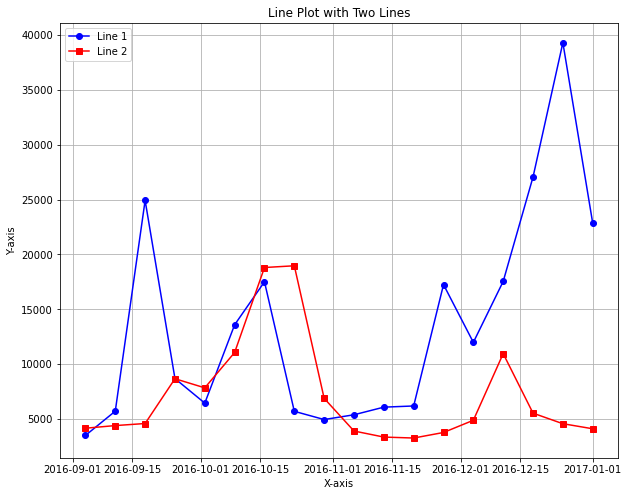

In [217]:
import matplotlib.pyplot as plt

# Sample data arrays (replace these with your data)
data_array1 = x
data_array2 = forecast

# Create the X-axis values (assuming the same for both arrays)
x_values = np.array(weekly_test.index)

# Create the line plot with two different lines
plt.plot(x_values, data_array1, label='Line 1', color='blue', marker='o')
plt.plot(x_values, data_array2, label='Line 2', color='red', marker='s')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot with Two Lines')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


#### Limitation of this model : Since we have weekly data with yearly repetetive pattern, seasonality of time series is 54 (no. of weeks in year). But if we pass 'seasonal_periods = 54' it throws following error

In [218]:
# Define model parameters
trend_type = 'add'  # time series is additive
seasonality_type = 'add'  # time series is additive
seasonal_periods = 54  # Adjust based on your data's seasonality

# Create and fit the Triple Exponential Smoothing model
model = sm.tsa.ExponentialSmoothing(weekly_train, trend=trend_type, seasonal=seasonality_type, seasonal_periods=seasonal_periods)
results = model.fit()

ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

#### Comment: Holt-Winter method could be better if we had more data. But due to data limitation results getting fluctuated.

#### This project can be extended with other Models like FBprophet and LSTM. But prophet library is not supporting to my python version. So I'm skipping that part. And due to time limit I have not tries LSTM model here. But it is possible to perform it.

#### Among all the above performed models, Holt-Winter model is good fitted to our data. We can do forecasting using Holt-Winter model

## Forecasting Model

In [219]:
# Training model on all available data (2 years = 106 weeeks)
# Define model parameters
trend_type = 'add'  # time series is additive
seasonality_type = 'add'  # time series is additive
seasonal_periods = 52  # Adjust based on your data's seasonality

# Create and fit the Triple Exponential Smoothing model
model = sm.tsa.ExponentialSmoothing(weekly_all, trend=trend_type, seasonal=seasonality_type, seasonal_periods=seasonal_periods)
results = model.fit()

### Forecasting the quantity for Jan’2017 to April’2017 (18 weeks)

In [220]:
forecast_steps = 18  # Number of forecasted steps
forecast = results.forecast(steps=forecast_steps)

### Plotting time series with forecasted results

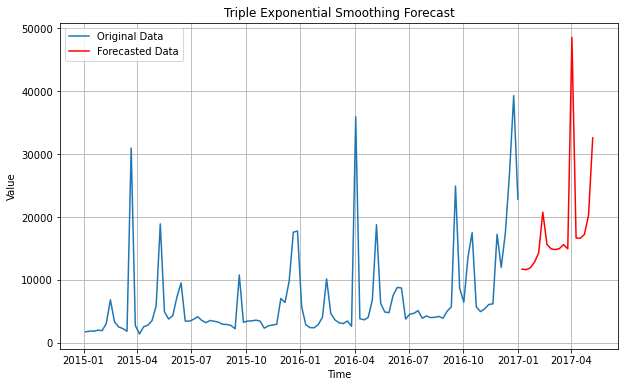

In [221]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_all.index, weekly_all, label='Original Data')
plt.plot(forecast.index, forecast, label='Forecasted Data', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Triple Exponential Smoothing Forecast')
plt.grid(True)
plt.show()

### Forecasted values of quantity for Jan’2017 to April’2017 are:

In [222]:
fore_result = pd.DataFrame(forecast)
fore_result = fore_result.rename(columns={0: 'Quantity'})
fore_result

,Quantity
2017-01-08,11711.010653
2017-01-15,11615.291718
2017-01-22,11927.063839
2017-01-29,12802.965212
2017-02-05,14296.937928
2017-02-12,20765.113543
2017-02-19,15627.336538
2017-02-26,14930.300921
2017-03-05,14808.435928
2017-03-12,14989.417106
